In [1]:
# display information about available GPU devices
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [13]:
# Define the path where our dataset is stored

from google.colab import drive
drive.mount('/content/drive')


# path = '/content/drive/My Drive/Colab Notebooks/Dataset'

# import os
# files = os.listdir(path)
# print(files)

# dataset_path= '/content/drive/My Drive/Colab Notebooks/Dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !git clone https://github.com/aniketshetty1nov/Machine_Learning_Projects.git
# Navigate to the cloned repository
# %cd Machine_Learning_Projects
path = '/content/Machine_Learning_Projects/Waste_Classification_Deep_learning/'

import os
files = os.listdir(path)
print(files)

# dataset_path = '/content/Machine_Learning_Projects/Waste_Classification_Deep_learning/Trash_Dataset'

['Dataset', 'WasteImagesDataset', 'combined_dataset', 'Codes']


In [22]:
import os
files = os.listdir("/content/Machine_Learning_Projects/Waste_Classification_Deep_learning/")
print(files)

['readMe', 'Trash_Dataset_Split', 'WasteImagesDataset', 'combined_dataset', 'Codes', 'Trash_Dataset']


In [ ]:
# Retrieve the names of all folders (representing trash types) within the dataset directory
garbage_types = os.listdir(dataset_path)

In [2]:
# Visualization purpose
!pip install tensorboardX
!pip install tensorboard
!pip install tensorboard-plugin-customizable-plots

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 15.5 MB/s eta 0:00:00


In [3]:
!pip install split-folders
!pip install optuna
!pip install --upgrade nvidia-ml-py3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19171 sha256=2d4fb25cf7cf33a7ce1ca1edbc1fd809e278df98cc1131717f95b5211bbc7f47
  Stored in directory: /root/.cache/pip/wheels/5c/d8/c0/46899f8be7a75a2ffd197a23c8797700ea858b9b34819fbf9e
Successfully built nvidia-ml-py3


In [4]:
import os
import shutil
import splitfolders
from pathlib import Path
import imghdr
import numpy as np
from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

In [ ]:
# Initialize an empty list to store image file paths and their respective labels
data = []

# Loop through each garbage type and collect its images' file paths
for garbage_type in garbage_types:
    for file in os.listdir(os.path.join(dataset_path, garbage_type)):
        # Append the image file path and its trash type (as a label) to the data list
        data.append((os.path.join(dataset_path, garbage_type, file), garbage_type))

# Convert the collected data into a DataFrame
df = pd.DataFrame(data, columns=['filepath', 'label'])

# Display the first few entries of the DataFrame
df.head()

,filepath,label
0,/content/drive/My Drive/Colab Notebooks/Datase...,trash
1,/content/drive/My Drive/Colab Notebooks/Datase...,trash
2,/content/drive/My Drive/Colab Notebooks/Datase...,trash
3,/content/drive/My Drive/Colab Notebooks/Datase...,trash
4,/content/drive/My Drive/Colab Notebooks/Datase...,trash


In [6]:
!git clone https://github.com/aniketshetty1nov/Machine_Learning_Projects.git
# Navigate to the cloned repository
# %cd Machine_Learning_Projects
path = '/content/Machine_Learning_Projects/Waste_Classification_Deep_learning/'

import os
files = os.listdir(path)
print(files)


Cloning into 'Machine_Learning_Projects'...
remote: Enumerating objects: 8378, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 8378 (delta 7), reused 25 (delta 1), pack-reused 8343
Receiving objects: 100% (8378/8378), 381.46 MiB | 34.52 MiB/s, done.
Resolving deltas: 100% (19/19), done.
Updating files: 100% (20873/20873), done.
['readMe', 'Trash_Dataset_Split', 'WasteImagesDataset', 'combined_dataset', 'Codes', 'Trash_Dataset']


In [8]:
data_dir = '/content/Machine_Learning_Projects/Waste_Classification_Deep_learning/Trash_Dataset'

In [10]:
count=0
image_extensions = [".png", ".jpg"]
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]

for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        if img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)
            count+=1
print(f"Removed {count} images")


Removed 0 images


In [14]:
os.mkdir('/content/drive/My Drive/Colab Notebooks/DensenetData')

In [18]:
# os.mkdir('/content/drive/My Drive/Colab Notebooks/DensenetData/train')
# os.mkdir('/content/drive/My Drive/Colab Notebooks/DensenetData/val')
os.mkdir('/content/drive/My Drive/Colab Notebooks/DensenetData/test')


In [19]:
import os
files = os.listdir("/content/drive/My Drive/Colab Notebooks/DensenetData")
print(files)

['train', 'val', 'test']


In [20]:
SEED = 42

In [23]:
splitfolders.ratio("/content/Machine_Learning_Projects/Waste_Classification_Deep_learning/Trash_Dataset", output = '/content/drive/My Drive/Colab Notebooks/DensenetData', seed = SEED, ratio = (.8,.1,.1), group_prefix = None)

Copying files: 2527 files [00:47, 53.68 files/s]


In [24]:
train_path = '/content/drive/My Drive/Colab Notebooks/DensenetData/train'
val_path = '/content/drive/My Drive/Colab Notebooks/DensenetData/val'
test_path = '/content/drive/My Drive/Colab Notebooks/DensenetData/test'

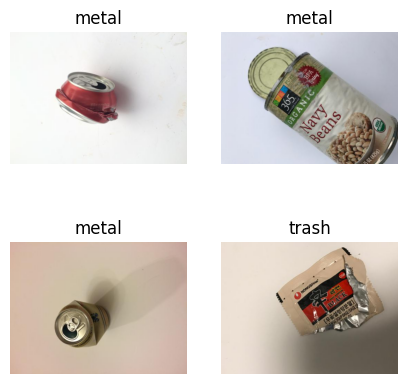

In [26]:
fig, axes = plt.subplots(2, 2, figsize = (5,5)) #выведем 4 изображения
axes = axes.ravel()

for i in np.arange(0, 4):

    category = random.choice(os.listdir(train_path)) #случайный выбор класса
    class_dir = os.path.join(train_path, category)

    image = random.choice(os.listdir(class_dir)) #cлучайный выбор изображения из класса

    img = plt.imread(os.path.join(class_dir,image))
    axes[i].imshow( img )
    axes[i].set_title(category)
    axes[i].axis('off')

In [28]:
total = 0
for category in os.listdir(train_path):
    count= 0
    for image in os.listdir(train_path + "/" + category):
        count += 1
        total +=1
    print(str(category).title() + ": " + str(count))
print(f"\nTotal number of train images: {total}")

Cardboard: 322
Plastic: 385
Glass: 400
Paper: 475
Metal: 328
Trash: 109

Total number of train images: 2019


In [29]:
# class names
class_names = sorted(os.listdir(train_path))
class_names

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [30]:
class_dis = [len(os.listdir(train_path + f"/{name}")) for name in class_names]
class_dis

[322, 400, 328, 475, 385, 109]

<ipython-input-31-f10baa20ce68>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


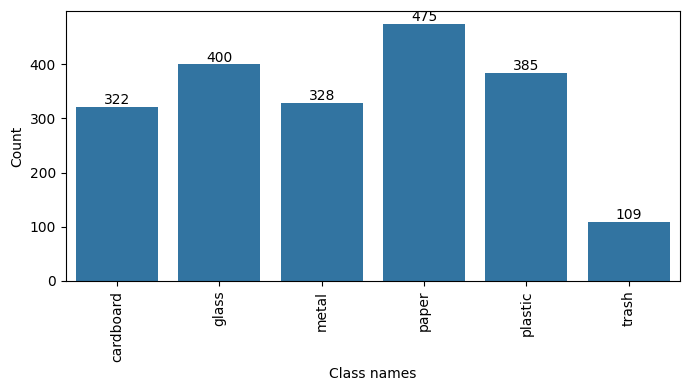

In [31]:
DF = pd.DataFrame(columns=['Class names','Count'])
DF['Class names']=class_names
DF['Count']=class_dis
plt.figure(figsize=(7,4))
ax=sns.barplot(x='Class names', y='Count', data=DF)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()

In [33]:
# Excluding some random images from the training data


In [34]:
for category in os.listdir(train_path):
    count = 0
    delete = 0
    for image in os.listdir(train_path + '/'  + category):
        count += 1
        while count > 1000:
            random_image = random.choice(os.listdir(train_path + '/' + category))
            delete_image = train_path + '/'  + category +  '/' + random_image
            os.remove(delete_image)
            delete+=1
            count-=1

    print(f'Deleted {delete} in {category}')

Deleted 0 in cardboard
Deleted 0 in plastic
Deleted 0 in glass
Deleted 0 in paper
Deleted 0 in metal
Deleted 0 in trash


In [36]:
# We limited the number of images in large classes to 1000. Let's see what the class distribution looks like now

In [37]:
class_dis = [len(os.listdir(train_path + f"/{name}")) for name in class_names]


<ipython-input-38-867262133893>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


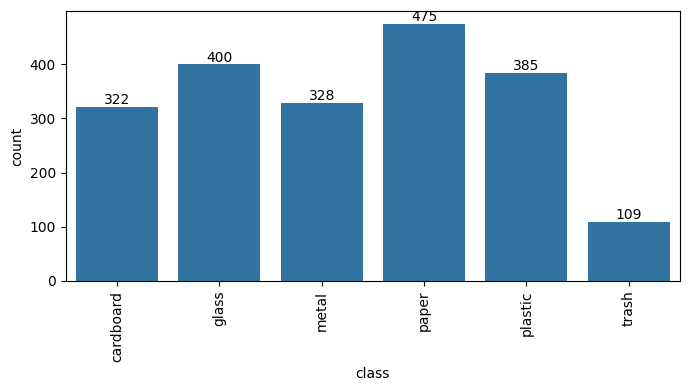

In [38]:
DF = pd.DataFrame(columns=['class','count'])
DF['class']=class_names
DF['count']=class_dis
plt.figure(figsize=(7,4))
ax=sns.barplot(x='class', y='count', data=DF)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()


In [42]:
# The data distribution now looks much better, although some image classes are still quite sparse. We will try to solve this problem using augmentation methods that we integrate into the model.

In [44]:
data_path = '/content/drive/My Drive/Colab Notebooks/DensenetData/'

In [47]:
# To train a neural network, it is necessary to ensure unification of image sizes. To do this, let’s find the average width and height of images in the entire dataset.

width = []
height = []
from PIL import Image
import numpy as np

for dirname in os.listdir(data_path):
    for category in os.listdir(data_path + '/' + dirname):
        for image in os.listdir(data_path + '/' + dirname + '/' + category):
            img = Image.open(data_path + '/' + dirname + '/' + category + '/' + image)
            width.append(img.width)
            height.append(img.height)

print('Mean width: {:.4f}'.format(np.mean(width)))
print('Mean Height: {:.4f}'.format(np.mean(height)))

Mean width: 512.0000
Mean Height: 384.0000


In [49]:
IMG_SIZE = (400, 400)


In [48]:
BATCH_SIZE = 32


In [50]:
writer = SummaryWriter()

In [51]:
train_data = tf.keras.utils.image_dataset_from_directory(train_path,
                                                         image_size=IMG_SIZE,
                                                         label_mode='categorical',
                                                         batch_size=BATCH_SIZE,
                                                         shuffle=True,
                                                         seed=SEED)

Found 2019 files belonging to 6 classes.


In [52]:
test_data = tf.keras.utils.image_dataset_from_directory(test_path,
                                                        image_size=IMG_SIZE,
                                                        label_mode='categorical',
                                                        batch_size=BATCH_SIZE,
                                                        shuffle=False)

Found 257 files belonging to 6 classes.


In [53]:
validation_data = tf.keras.utils.image_dataset_from_directory(val_path,
                                                              image_size=IMG_SIZE,
                                                              label_mode='categorical',
                                                              batch_size=BATCH_SIZE,
                                                              shuffle=True,
                                                              seed=SEED)


Found 251 files belonging to 6 classes.


In [54]:
# Create directories for train and test logs and write logs to it

In [56]:
experiment_name = "Transfer Learning"


In [57]:
train_log_dir = os.path.join("logs", experiment_name, "train")
test_log_dir = os.path.join("logs", experiment_name, "test")

os.makedirs(train_log_dir, exist_ok=True)
os.makedirs(test_log_dir, exist_ok=True)

train_writer = SummaryWriter(train_log_dir)
test_writer = SummaryWriter(test_log_dir)

In [58]:
# Building the model
base_model = tf.keras.applications.densenet.DenseNet169(include_top=False,
                                                   weights='imagenet',
                                                   input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [59]:
base_model.summary()

Model: "densenet169"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 400, 400, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 406, 406, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 200, 200, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 200, 200, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 200, 200, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 202, 202, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 100, 100, 64)   │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 100, 100, 64)   │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 100, 100, 64)   │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 100, 100, 128)  │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 100, 100, 128)  │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 100, 100, 128)  │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 100, 100, 32)   │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 100, 100, 96)   │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 12,642,880 (48.23 MB)

 Trainable params: 12,484,480 (47.62 MB)

 Non-trainable params: 158,400 (618.75 KB)

In [60]:
base_model.trainable = False

In [62]:
# Let's create a data augmentation layer to improve classification accuracy. This layer is active only during model training.
#


In [63]:
data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip("horizontal"),
                                         tf.keras.layers.RandomRotation(0.2),
                                         tf.keras.layers.RandomZoom(0.2),
                                         tf.keras.layers.RandomHeight(0.2),
                                         tf.keras.layers.RandomWidth(0.2),],
                                         name ="data_augmentation")

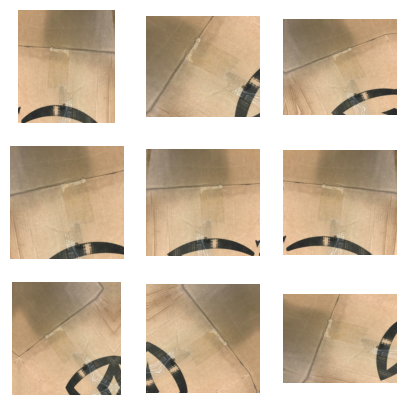

In [64]:
for image, _ in train_data.take(1):
    plt.figure(figsize=(5, 5))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')


In [65]:
# Let's combine the model with the augmentation layer, and also add several layers:

# GlobalAveragePooling2D layer, which calculates the arithmetic average over all channels to combine feature maps
# A fully connected layer with 128 neurons and a Dropout layer, which excludes some neurons from the previous fully connected layer with a given probability, thereby reducing the possible effect of overfitting.
# Output fully connected layer with the number of outputs corresponding to the number of classes of our data.

In [66]:
name="DenseNet169"

DenseNet169_model=tf.keras.Sequential([tf.keras.Input(shape=(None, None, 3), name="input_layer"),
                    data_augmentation,
                    base_model,
                    tf.keras.layers.GlobalAveragePooling2D(),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dropout(0.2),
                    tf.keras.layers.Dense(len(class_names), activation='softmax')
                    ], name=name)

In [67]:
DenseNet169_model.compile(loss='categorical_crossentropy',
                              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                              metrics=['accuracy'])

In [68]:
DenseNet169_model.summary()

Model: "DenseNet169"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet169 (Functional)             │ (None, None, None, 1664)    │      12,642,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1664)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         213,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,856,774 (49.04 MB)

 Trainable params: 213,894 (835.52 KB)

 Non-trainable params: 12,642,880 (48.23 MB)

In [73]:
def log_to_tensorboard(epoch, logs):
    train_writer.add_scalar('loss', logs['loss'], epoch)
    train_writer.add_scalar('accuracy', logs['accuracy'], epoch)

    # Use get method with a default value of None to avoid KeyError
    val_loss = logs.get('val_loss', None)
    val_accuracy = logs.get('val_accuracy', None)

    if val_loss is not None:
        test_writer.add_scalar('val_loss', val_loss, epoch)
    if val_accuracy is not None:
        test_writer.add_scalar('val_accuracy', val_accuracy, epoch)


# Creating a Callback Function
def create_callback(model_name):

    # termination of training when accuracy does not improve within 3 epochs
    early_stop = tf.keras.callbacks.EarlyStopping(patience=3,
                                                monitor="val_loss",
                                                mode="min",
                                                verbose=1)

    # decrease in learning rate when the error rate does not decrease over 2 epochs
    reduce_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                              factor=0.2,
                                                              patience=2,
                                                              verbose=1,
                                                              min_lr=0.00001)

    log_to_tensorboard_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: log_to_tensorboard(epoch, logs))
    # saving model
    # check_model = tf.keras.callbacks.ModelCheckpoint(model_name + ".h5",
    check_model = tf.keras.callbacks.ModelCheckpoint(model_name + ".keras",
                                                   monitor="val_accuracy",
                                                   mode="max",
                                                   save_best_only=True)
    callback = [early_stop, reduce_learning_rate, check_model, log_to_tensorboard_callback]
    return callback

In [74]:
DenseNet169_callback = create_callback(name)

In [75]:
EPOCH=20

In [ ]:
import time
start_time = time.time()
DenseNet169_history = DenseNet169_model.fit(train_data,
                                                    epochs=EPOCH,
                                                    steps_per_epoch=len(train_data),
                                                    validation_data=validation_data,
                                                    validation_steps=len(validation_data),
                                                    callbacks=DenseNet169_callback)

Epoch 1/20
10/64 ━━━━━━━━━━━━━━━━━━━━ 22:18 25s/step - accuracy: 0.1658 - loss: 6.7002